## Linear Regression using Scikit-Learn

There is an open-source, commercially usable machine learning toolkit called scikit-learn. This toolkit contains implementations of many of the algorithms that you will work with in this course.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor 
# SGDRegressor is a model from Scikit-learn that performs linear regression using Stochastic Gradient Descent (SGD).
from sklearn.preprocessing import StandardScaler 
#use standard features like subtract mean, divide by std
from lab_utils_multi import load_house_data #dataset provided
from lab_utils_common import dlc #likely contains colors or style for plotting
np.set_printoptions(precision=2)
plt.style.use("C:/Users/prish/AI-ML/Machine_Learning/deeplearning.mplstyle")

### Gradient Descent

Scikit-learn has a gradient descent regression model sklearn.linear_model.SGDRegressor. Like your previous implementation of gradient descent, this model performs nest with normalized inputs. sklearn.preprosseing.StandardScalar will perform z-score normalization as in previous lab.

#### Load the dataset

In [5]:
X_train, Y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

#### Scale/normalize the training data

In [8]:
scalar = StandardScaler() #StandardScaler is a tool to normalize the features by formula
# x-mean/sd
X_norm = scalar.fit_transform(X_train) #fit computes mean and sd from traning data
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


#### Create and fit the regression model

In [13]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm,Y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 118, number of weight updates: 11683.0


#### View parameters

Note, the parameters are associated with the normalized input data. The fit parameters are very close to those found in the previous lab with this data.

In [16]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.06 -21.   -32.38 -38.08], b:[363.13]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


#### Make predictions

In [19]:
#make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
#make a prediction using w,b
y_pred = np.dot(X_norm,w_norm) + b_norm

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")
#y_pred == y_pred_sgd creates a boolean array by comparing each element
# .all checks whether all elements in numpy array are True 

#we are checking first 4 predicted values and first 4 target values
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{Y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.11 485.93 389.64 492.1 ]
Target values 
[300.  509.8 394.  540. ]


#### Plot Results

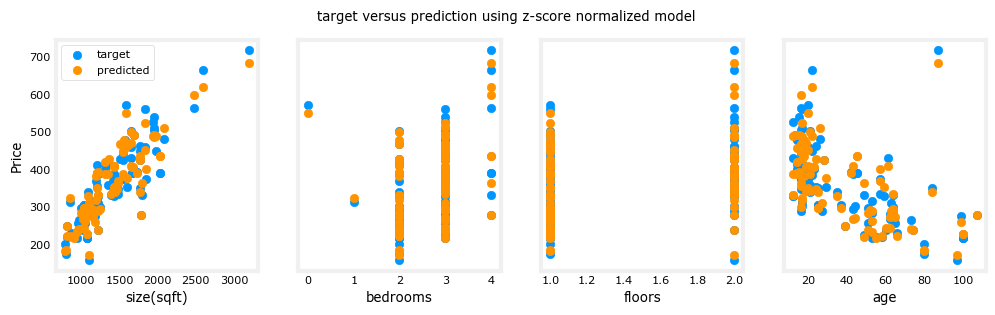

In [25]:
#plot predictions and targerts vs original features 
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey= True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],Y_train,label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc['dlorange'],label='predicted')
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## Linear Regression using Scikit-Learn 

Closed-form linear regression refers to solving linear regression analytically—i.e., by directly computing the optimal weights (θ) using a mathematical formula instead of using iterative methods like gradient descent. This model linear regression implements closed form linear regression. It is used for smaller datasets.

### Example 1

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from lab_utils_multi import load_house_data
plt.style.use("C:/Users/prish/AI-ML/Machine_Learning/deeplearning.mplstyle")
np.set_printoptions(precision=2)

In [34]:
X_train = np.array([1.0,2.0])
Y_train = np.array([300,500])

#### Create and fit the model

In [37]:
linear_model = LinearRegression() #this created a regression object
#X must be 2d array
linear_model.fit(X_train.reshape(-1,1),Y_train)  #fit performs linear regression fitting the parameters to input data

LinearRegression()

#### View Parameters

In [40]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w}, b = {b:0.2f}")
print(f"'manual' prediction: f_wb = wx+b : {1200*w + b}")

w = [200.], b = 100.00
'manual' prediction: f_wb = wx+b : [240100.]


#### Make Predictions

In [48]:
y_pred = linear_model.predict(X_train.reshape(-1,1))

print("Prediction on training set:", y_pred)

X_test = np.array([[1200]]) #2d array with 1 row and 1 column
print(f"Prediction for 1200 sqft house: ${linear_model.predict(X_test)[0]:0.2f}")
#[0] means first predicted value from array of predictions

Prediction on training set: [300. 500.]
Prediction for 1200 sqft house: $240100.00


### Second Example
This un-normalized run will not take too much time unlike previous labs

In [53]:
#load the dataset
X_train,Y_train  = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [55]:
linearModel = LinearRegression()
linearModel.fit(X_train,Y_train)

LinearRegression()

In [57]:
b = linearModel.intercept_
w = linearModel.coef_
print(f"w = {w}, b = {b:0.2f}")

w = [  0.27 -32.62 -67.25  -1.47], b = 220.42


In [73]:
print(f'Prediction on training set:\n {linearModel.predict(X_train)[:4]}')
print(f'Prediction using w,b:\n {(X_train @ w + b)[:4]}')
print(f'Target Values \n {Y_train[:4]}')
#since a number of answers will be there so we are just taking first 4 to see how model is performing
#below there is no need of writing [0] since only 1 value is being predicted

x_house = np.array([1200,3,1,40]).reshape(-1,4)
x_house_predict = linearModel.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.2f}")

Prediction on training set:
 [295.18 485.98 389.52 492.15]
Prediction using w,b:
 [295.18 485.98 389.52 492.15]
Target Values 
 [300.  509.8 394.  540. ]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709.09


## Practice Lab

In this lab, you will implement linear regression with one variable to predict profits for a restaurant franchise.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [19]:
#load the dataset
x_train,y_train = load_data()
#X_train is population of city
#Y_train is profit of restaurent in that city...negative valye indicates loss

### View the variables

In [ ]:
#viewing the dataset once before starting
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

These values represent the city population times 10,000.For example, 6.1101 means that the population for that city is 61,101.

In [25]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


These represent your restaurant's average monthly profits in each city, in units of 10,000 dollars.For example, 17.592 represents 175,920 dollars in average monthly profits for that city.-2.6807 represents -$26,807 in average monthly loss for that city.

### Check the dimensions of your variables

In [34]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


These are Numpy 1D Arrays

### Visualize your data

- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.

Text(0.5, 0, 'Population')

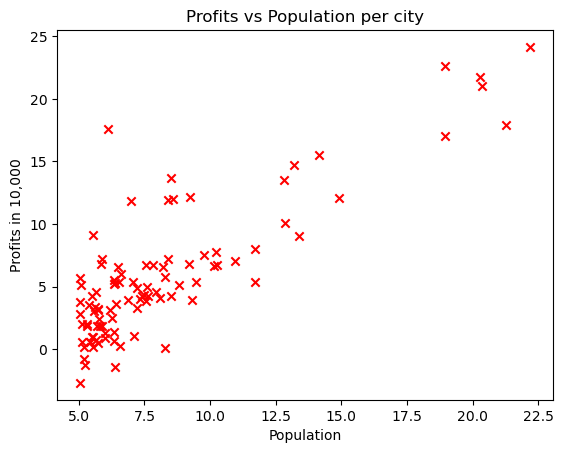

In [39]:
#create a scatter plot of the data. To change the markers to red "X", 
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Profits vs Population per city")
plt.ylabel("Profits in 10,000")
plt.xlabel("Population")

![Summary](Refresher.png)

In [54]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    total_cost=0
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost += (f_wb - y[i])**2

    total_cost = cost/(2*m)

    return total_cost

In [63]:
#checking if above code is correct or not since i wrote it
initial_w = 2
initial_b = 1

cost = compute_cost(x_train,y_train,initial_w,initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import * #a file to check if the code we wrote is correct or not
compute_cost_test(compute_cost)
#This runs the test function compute_cost_test() on your function compute_cost.
#It compares the output of your function against expected output on predefined inputs.
#If your implementation is correct, it will say something like: (All tests passed)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


![Gradient Descent](Descent.png)

In [61]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]

    dj_db = (1/m)*dj_db
    dj_dw = (1/m)*dj_dw

    return dj_dw,dj_db

In [67]:
#checking if the function i created is correct
intial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b:', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b: 97.479035898567 10.480464948453612
Using X with shape (4, 1)
All tests passed!


In [71]:
#now lets implement above functions in our dataset
test_w = 0.2
test_b = 0.2

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114434 -4.007175051546391


### Learning Paramters using batch gradient descent

Batch Gradient Descent
1. At each step (called an epoch):
2. Compute predictions for all training examples.
3. Calculate the cost (error/loss).
4. Compute the gradient (how much to change weights).
5. Update all weights using the gradient.
6. Repeat until convergence (minimum cost reached).

In [79]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num):
    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num):
        dj_dw,dj_db = gradient_function(x, y, w, b )  

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i<100000:
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i%math.ceil(num/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history

In [81]:
#initialize fitting parameters. Recall that the shape of w is (n,)
intial_w = 0.
intial_b = 0.

iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     7.62   
Iteration  150: Cost     5.23   
Iteration  300: Cost     4.92   
Iteration  450: Cost     4.73   
Iteration  600: Cost     4.63   
Iteration  750: Cost     4.56   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.49   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.1676968448308291 -3.6435751667221115


We will now use the final parameters from gradient descent to plot the linear fit. To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below. Since if we dont loop then we will get prediction for single example.

In [86]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w*x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

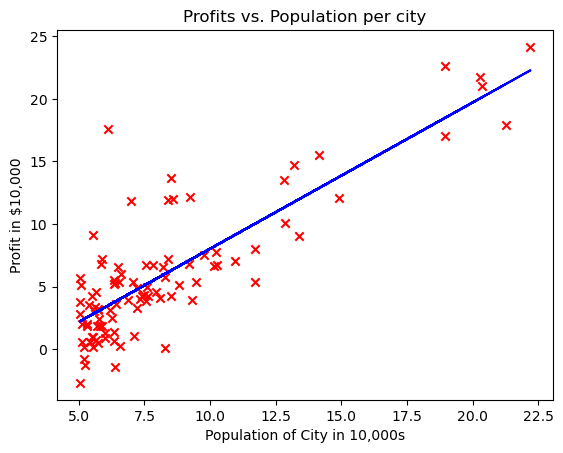

In [88]:
#plot the linear fit
plt.plot(x_train,predicted,c='b')

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

Your final values of w,b can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people.

In [91]:
#35000 can be translated into model as np.array([3.5]) and similarly np.array([7.])
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))
# '%.f' %(number) formats the number upto 2 decimal places

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4433.64
For population = 70,000, we predict a profit of $45303.03
